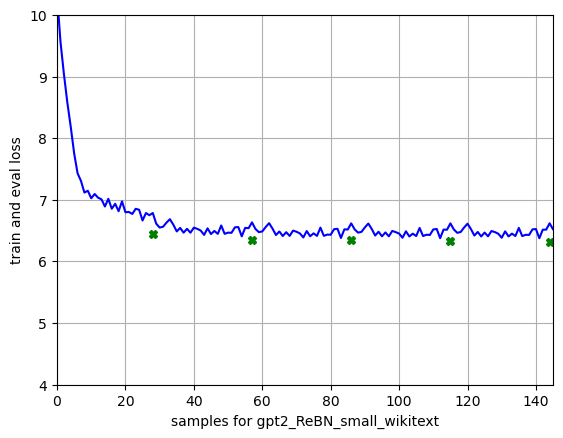

Modelconfig:GPTConfig(block_size=256,vocab_size=50257,n_layer=6,n_head=6,n_embd=384,dropout=0.2,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNorm',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.333766



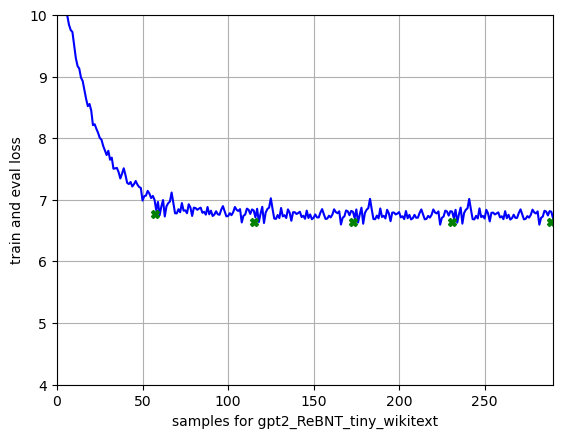

Modelconfig:GPTConfig(block_size=128,vocab_size=50257,n_layer=2,n_head=2,n_embd=256,dropout=0.1,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNormTranspose',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.633959



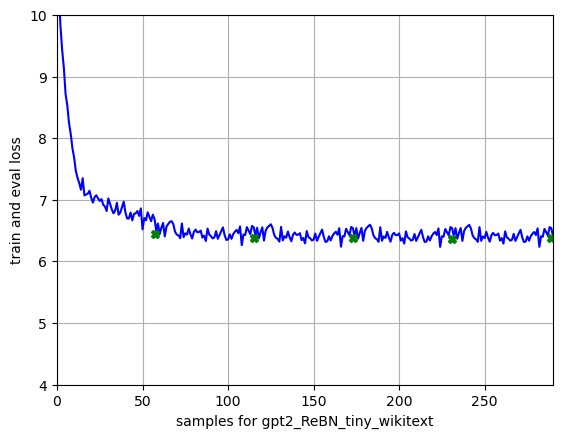

Modelconfig:GPTConfig(block_size=128,vocab_size=50257,n_layer=2,n_head=2,n_embd=256,dropout=0.1,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNorm',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.368369



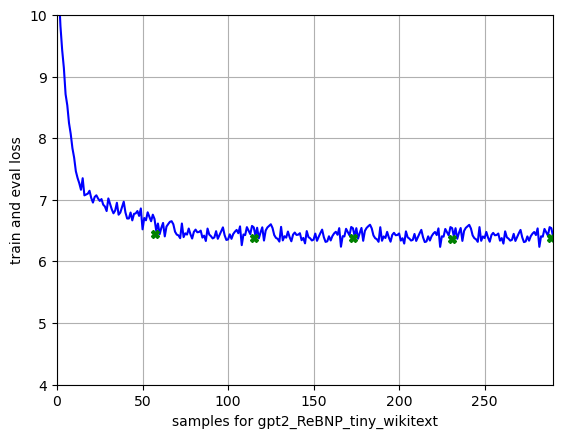

Modelconfig:GPTConfig(block_size=128,vocab_size=50257,n_layer=2,n_head=2,n_embd=256,dropout=0.1,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNormIdPure',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.368369



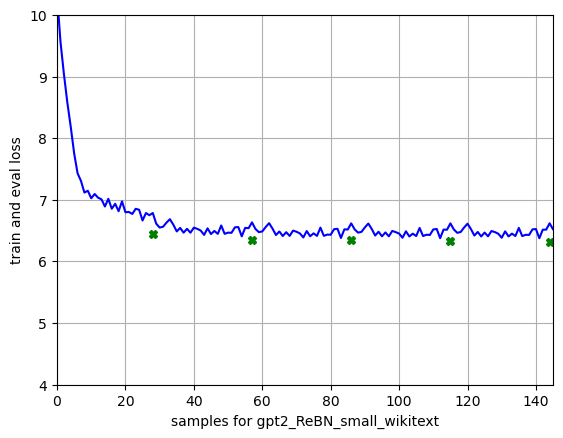

Modelconfig:GPTConfig(block_size=256,vocab_size=50257,n_layer=6,n_head=6,n_embd=384,dropout=0.2,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNorm',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.333766



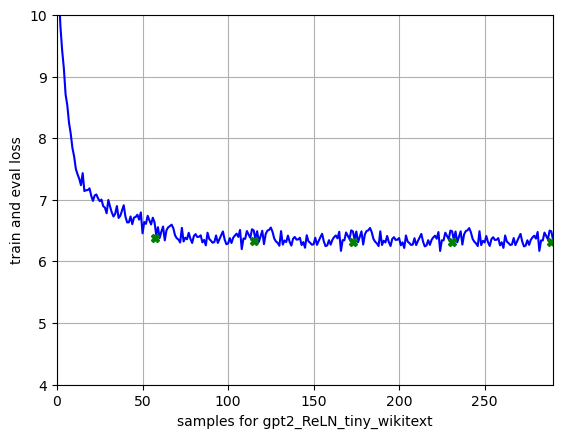

Modelconfig:GPTConfig(block_size=128,vocab_size=50257,n_layer=2,n_head=2,n_embd=256,dropout=0.1,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='LayerNorm',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.319238



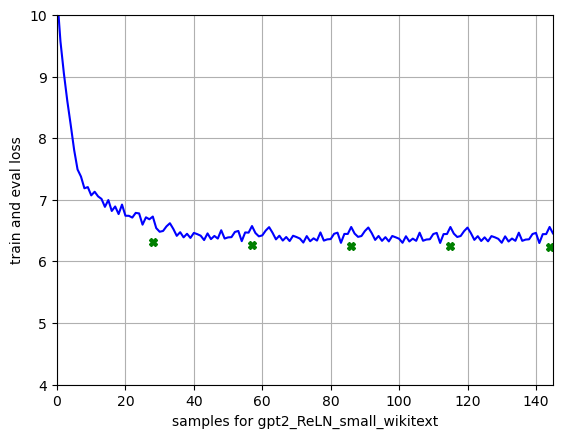

Modelconfig:GPTConfig(block_size=256,vocab_size=50257,n_layer=6,n_head=6,n_embd=384,dropout=0.2,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='LayerNorm',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.248614



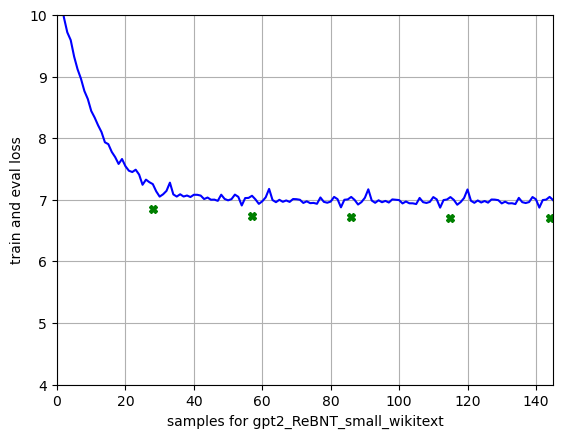

Modelconfig:GPTConfig(block_size=256,vocab_size=50257,n_layer=6,n_head=6,n_embd=384,dropout=0.2,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNormTranspose',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.718887



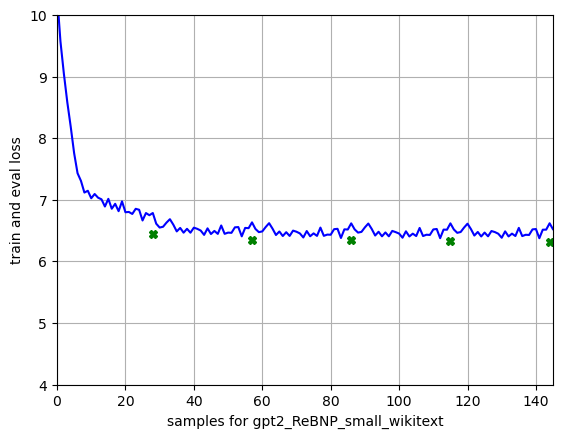

Modelconfig:GPTConfig(block_size=256,vocab_size=50257,n_layer=6,n_head=6,n_embd=384,dropout=0.2,bias=True,flash=False,transformer_active_func='ReLU',norm_layer='BatchNormIdPure',single_output=False,use_weight_tying=True,custom_ln=False,use_causal=False,shift_targets=True)
Eval loss after 5 epochs: 6.333766


In [1]:
import matplotlib.pyplot as plt
import numpy as np


import tomli

with open("test2.toml", "rb") as f:
    toml_dict = tomli.load(f)
    # toml_dict keys: run: [] : config, params, train_loss, eval_iter, eval_loss, eval_loss_last_train, checkpoints, export

    for i, run in enumerate(toml_dict['runs']):
        train_x_points = np.arange(len(run['train_loss']))
        train_y_points = np.array(run['train_loss'])

        eval_x_points = train_x_points 
        eval_y_points = np.empty(train_y_points.size)
        eval_y_points[:] = np.nan
        eval_y_points = eval_y_points.astype(np.double)
    
        eval_point_mask = np.isnan(eval_y_points)
        for j,l in enumerate(run['eval_loss']):
            eval_y_points[(j+1)*run['eval_iter'] - 1 ] = l

        plt.plot(train_x_points, train_y_points, 'b', linestyle='-') 
        plt.plot(eval_x_points[eval_point_mask], eval_y_points[eval_point_mask], 'g', marker='X',  linestyle='')

        num_epochs = 5
        iter_display_limit = run['eval_iter'] * num_epochs
        print(run['export'])

        plt.xlabel(f"samples for {'_'.join(run['checkpoints'][0].split('/')[-1].split('_')[1:5])}")
        plt.ylabel('train and eval loss')
        plt.ylim(4, 10)
        plt.xlim(0, iter_display_limit)
        plt.grid()
        plt.show()
        print(f"{run['config']}")
        print(f"Eval loss after {num_epochs} epochs: {run['eval_loss'][num_epochs]}")